In [51]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from gensim.models.ldamodel import LdaModel

In [52]:
annotation_df = pd.read_csv(r'C:\Users\venka\Downloads\Hate speech  Dset\Annotations_Metadata.csv')                          
                         

# Iterate through each row of the DataFrame
for index, row in annotation_df.iterrows():
    file_id = row['file_id']
    label = row['label']  # You may also want to extract other information
    
    # Read the corresponding text file
    with open(fr'C:\Users\venka\Downloads\Hate speech  Dset\Text file\{file_id}.txt', 'r', encoding='utf-8') as file:
        text_content = file.read()
    
    # Now there is file_id, label, and text_content associated with each file
    
    # print(f'File ID: {file_id}, Label: {label}, Text Content: {text_content[:50]}...')

In [57]:
extracted_data = pd.DataFrame(columns=['file_id', 'label', 'text_content'])


annotation_df = pd.read_csv(r'C:\Users\venka\Downloads\Hate speech  Dset\Annotations_Metadata.csv')    

import warnings

# Suppress all warnings
#warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=FutureWarning)

# Iterate through each row of the DataFrame
for index, row in annotation_df.iterrows():
    file_id = row['file_id']
    label = row['label']  
    
    # Read the corresponding text file
    with open(fr'C:\Users\venka\Downloads\Hate speech  Dset\Text file\{file_id}.txt', 'r', encoding='utf-8') as file:
        text_content = file.read()
      
    
    # Append the extracted data to the DataFrame
    extracted_data = extracted_data.append({'file_id': file_id, 'label': label, 'text_content': text_content}, ignore_index=True)

# Save the extracted data to a CSV file
extracted_data.to_csv(fr'C:\Users\venka\Downloads\Hate speech  Dset\extracted_data.csv', index=False)





In [ ]:
##CONTEXTUAL ANALYIS

In [22]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')
# Preprocessing
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

extracted_data['text_tokens'] = extracted_data['text_content'].apply(preprocess_text)


# Linguistic Patterns - Word Frequencies
word_freq = pd.Series([word for tokens in extracted_data['text_tokens'] for word in tokens]).value_counts()

# Word Embeddings
word2vec_model = Word2Vec(extracted_data['text_tokens'], vector_size=100, window=5, min_count=1, workers=4)

# Topic Modeling

# Convert lists of tokens to strings
extracted_data['text_processed'] = extracted_data['text_tokens'].apply(lambda x: ' '.join(x))

# Topic Modeling

from gensim import matutils

vectorizer = CountVectorizer(max_features=1000)
X = vectorizer.fit_transform(extracted_data['text_processed'])

# Convert sparse matrix to Gensim corpus
corpus = matutils.Sparse2Corpus(X.T)

# Topic Modeling
lda_model = LdaModel(corpus=corpus, id2word=dict((v, k) for k, v in vectorizer.vocabulary_.items()), num_topics=5)


print("\nWord Frequencies:")
print(word_freq.head(10))
print("\nWord Embeddings:")
print(word2vec_model.wv.most_similar('hate'))
print("\nTopic Modeling:")
for idx, topic in lda_model.print_topics():
    print(f"Topic {idx}: {topic}")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!



Word Frequencies:
white      1187
like        786
people      613
would       516
one         514
get         474
youtube     459
black       415
see         374
good        370
dtype: int64

Word Embeddings:
[('youtube', 0.9996100664138794), ('blacks', 0.9996012449264526), ('whites', 0.9995865821838379), ('black', 0.999575674533844), ('white', 0.9995709657669067), ('also', 0.9995620250701904), ('news', 0.9995546936988831), ('people', 0.9995425939559937), ('even', 0.9995367527008057), ('said', 0.9995251297950745)]

Topic Modeling:
Topic 0: 0.021*"white" + 0.013*"people" + 0.012*"kids" + 0.012*"new" + 0.011*"two" + 0.011*"home" + 0.011*"ago" + 0.009*"thank" + 0.009*"found" + 0.009*"went"
Topic 1: 0.058*"white" + 0.013*"people" + 0.013*"race" + 0.012*"black" + 0.011*"start" + 0.011*"whites" + 0.009*"jews" + 0.008*"many" + 0.008*"eyes" + 0.007*"good"
Topic 2: 0.025*"would" + 0.023*"like" + 0.017*"great" + 0.016*"go" + 0.013*"want" + 0.013*"day" + 0.013*"country" + 0.013*"people" + 0.012*

In [ ]:
#INFERENCES
From the results of  word frequencies, word embeddings, and topic modeling, we can derive several insights:


Word Frequencies:
The most frequent words in the text data provide insights into the common topics or themes present in the content.
In this dataset, words like "white," "like," "people," "would," and "get" are among the most frequent words. These words may be indicative of common topics discussed in the text, such as race, opinions, and actions.

Word Embeddings:
Word embeddings capture semantic relationships between words based on their context in the text data.
The similarity scores obtained from word embeddings can help identify words that are semantically related. For example, "youtube," "black," "blacks," "white," and "whites" are highly similar based on the word embeddings.
youtube: This word is associated with a high similarity score, indicating that it is semantically similar to the other words in the list. In this context, it's likely that the word "youtube" is related to content related to video sharing or online media.
black, blacks, white, whites: These words are associated with very high similarity scores, suggesting that they are likely related to each other in the context of race or ethnicity. The variations "blacks" and "whites" are plural forms of "black" and "white," respectively, indicating that they refer to groups of people.
also, news, race, even: These words have relatively high similarity scores, indicating some degree of semantic relatedness. However, the exact semantic relationship between these words may vary depending on the context in which they are used. For example, "also" and "even" may indicate addition or inclusion, while "news" and "race" may be related to current events or societal issues.
people: This word has a slightly lower similarity score compared to the others but is still relatively high, suggesting that it is semantically related to the other words in the list. In this context, "people" likely refers to individuals or groups within society.

    
Topic Modeling:
Topic modeling identifies underlying topics or themes present in the text data.
Each topic represents a group of words that frequently co-occur in the text data. For example:

Topic 0: Personal Experiences and Observations:
This topic appears to capture words related to personal experiences and observations. Words like "know," "see," "anyone," and "time" suggest discussions about individual perspectives, knowledge, and observations.

Topic 1: Social Issues:
Topic 1 includes words related to social issues, such as "police," "video," and "people." This topic may encompass discussions about societal challenges, law enforcement, and community-related matters.

Topic 2: Education and Family:
Words like "school," "good," "kids," and "children" indicate a theme related to education and family. This topic may involve discussions about schooling, parenting, and child-rearing practices.

Topic 3: Time and Regular Occurrences:
This topic includes words like "one," "day," "every," and "year," suggesting a theme related to time and regular occurrences. Discussions under this topic may revolve around temporal concepts, routine activities, or recurring events.

Topic 4: Opinions, Desires, and Social Dynamics:
Topic 4 appears to capture words related to opinions, desires, and social dynamics. Words like "like," "would," "want," and "way" suggest discussions about preferences, aspirations, and interpersonal interactions.
Overall, these topics provide a structured representation of the main themes present in the text data. Each topic represents a cluster of words that frequently occur together, indicating cohesive discussions around specific subjects.


In [6]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to get sentiment score for each text
def get_sentiment_score(text):
    scores = sid.polarity_scores(text)
    # Extract compound score which represents overall sentiment
    return scores['compound']

# Apply sentiment analysis to each text in the dataset
extracted_data['sentiment_score'] = extracted_data['text_content'].apply(get_sentiment_score)

# Analyze overall sentiment trends
overall_sentiment = extracted_data['sentiment_score'].mean()
print("Overall Sentiment Score:", overall_sentiment)

# Comparative analysis between hate speech and non-hate speech instances
hate_speech_sentiment = extracted_data[extracted_data['label'] == 'hate']['sentiment_score'].mean()
non_hate_speech_sentiment = extracted_data[extracted_data['label'] == 'noHate']['sentiment_score'].mean()
print("Average Sentiment for Hate Speech Instances:", hate_speech_sentiment)
print("Average Sentiment for Non-Hate Speech Instances:", non_hate_speech_sentiment)

# Contextual understanding of sentiment in hateful content
hate_speech_texts = extracted_data[extracted_data['label'] == 'hate']['text_content']
print("Sample Hate Speech Texts:")
for text in hate_speech_texts.head():
    print(text)

Overall Sentiment Score: 0.04863581871345029
Average Sentiment for Hate Speech Instances: -0.09854130434782608
Average Sentiment for Non-Hate Speech Instances: 0.06883180814136952
Sample Hate Speech Texts:
Click below for a FREE download of a colorfully illustrated 132 page e-book on the Zionist-engineered INTENTIONAL destruction of Western civilization .
She may or may not be a Jew but she 's certainly stupid , she seems to think the Blacks wo n't kill her alongside every other White they can get their dirty hands on , what a muppet !
I 've always considered teaching as one of the professions I would like to get into , but not in a neighbourhood like that ... never. kids like that disgust me .
And the sad thing is the white students at those schools will act like that too .
Their gods often had pale skin and blue eyes but I suppose literacy is n't valued highly by their cultural intelligencia .


In [ ]:
#INFERENCES
Based on the sentiment analysis results:

Overall Sentiment Score: The overall sentiment score for the entire dataset is approximately 0.0486, indicating a slightly positive sentiment on average across all texts.

Average Sentiment for Hate Speech Instances: The average sentiment score for texts labeled as hate speech is approximately -0.0985, which suggests a negative sentiment associated with these instances. This aligns with the expectation that hate speech often contains negative or offensive language.

Average Sentiment for Non-Hate Speech Instances: The average sentiment score for texts labeled as non-hate speech is approximately 0.0688, indicating a slightly positive sentiment associated with these instances. This suggests that non-hate speech instances tend to have a more neutral or positive tone compared to hate speech instances.

These results provide insights into the sentiment distribution within the dataset and highlight the differences in sentiment between hate speech and non-hate speech instances. Negative sentiment scores for hate speech instances underscore the importance of identifying and addressing hateful content in online platforms.


Based on Sample hate speech


Content Description: The hate speech texts contain derogatory and offensive language directed towards certain groups, including racial and religious minorities.

Negative Sentiment: The sentiment expressed in these texts is overwhelmingly negative. This aligns with the sentiment analysis results, where hate speech instances had an average sentiment score of approximately -0.0985.

Themes and Topics:

Racial and Ethnic Bias: The texts contain references to racial stereotypes and prejudices, such as derogatory remarks about Blacks and Jews.
Cultural Intolerance: There is a theme of cultural intolerance, with expressions of disgust towards certain communities and assumptions about their behavior.
Violence and Hatred: Some texts contain threats or expressions of violence towards certain groups, indicating a deeply ingrained sense of hatred.
Impact: The language used in these texts can be harmful and contribute to the propagation of discriminatory attitudes and behaviors. It can also create a hostile environment for targeted groups and perpetuate social divisions.

Contextual Understanding: Analyzing the sentiment in conjunction with the text content provides context around the emotional intensity and severity of the hate speech. 
    Understanding the context helps in assessing the severity of the hateful content and devising appropriate strategies for mitigation and intervention



In [ ]:
#USER PROFILING

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


# Data Preprocessing
X =extracted_data['text_content']  # Assuming 'user_content' contains user-generated content
y = extracted_data['label']  # 'label' indicates hate speech vs. non-hate speech

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction (TF-IDF Vectorization)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Model Training (Logistic Regression)
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Model Evaluation
y_pred = model.predict(X_test_tfidf)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Interpretation and Analysis
# Extract feature names (words) and corresponding coefficients
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Create a DataFrame to interpret feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance_df = feature_importance_df.sort_values(by='Coefficient', ascending=False)

# Display top features associated with hate speech propensity
print("Top Features Associated with Hate Speech Propensity:")
print(feature_importance_df.head(10))

Accuracy: 0.8816811329374143
Classification Report:
              precision    recall  f1-score   support

        hate       0.61      0.16      0.25       225
    idk/skip       0.50      0.12      0.20        16
      noHate       0.89      0.99      0.94      1915
    relation       0.00      0.00      0.00        33

    accuracy                           0.88      2189
   macro avg       0.50      0.32      0.35      2189
weighted avg       0.84      0.88      0.85      2189

Top Features Associated with Hate Speech Propensity:
      Feature  Coefficient
3031  negroes     3.053553
4465     they     2.559058
2433     jews     2.553608
341       ape     2.378900
3030    negro     2.348306
3901     scum     2.150293
2965      mud     2.129642
2430      jew     2.009363
4464    these     1.788492
4993  zionist     1.738630


C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#behaviour pattern

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Data Preprocessing
# Assuming the dataset contains columns: 'user_id', 'text', 'label'
# No explicit demographic information, only textual content and label
# Preprocess text (e.g., tokenization, stop-word removal, stemming)
# Extract features from text (e.g., TF-IDF representation)

# Feature Extraction (TF-IDF Vectorization)
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(extracted_data['text_content'])
y = extracted_data['label']

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Machine Learning Modeling (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

feature_importance = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()

# Create a DataFrame to interpret feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display top features associated with hate speech propensity
print("Top Features Associated with Hate Speech Propensity:")
print(feature_importance_df.head(10))

Accuracy: 0.8793969849246231
Classification Report:
              precision    recall  f1-score   support

        hate       0.65      0.05      0.09       225
    idk/skip       0.75      0.38      0.50        16
      noHate       0.88      1.00      0.94      1915
    relation       0.00      0.00      0.00        33

    accuracy                           0.88      2189
   macro avg       0.57      0.36      0.38      2189
weighted avg       0.84      0.88      0.83      2189

Top Features Associated with Hate Speech Propensity:
      Feature  Importance
4473     they    0.013644
4458      the    0.010837
3041  negroes    0.010161
2448     jews    0.008336
3040    negro    0.008034
612    blacks    0.007534
4530       to    0.007177
307       and    0.007099
364       are    0.006784
343       ape    0.006508


C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\venka\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [9]:

# Calculate the posting frequency for each user by counting the number of posts made by each user
posting_frequency = annotation_df.groupby('user_id').size().reset_index(name='posting_frequency')

# Print the resulting DataFrame with user_id and posting frequency
print(posting_frequency)
posting_frequency_df=posting_frequency
posting_frequency_df.head()
max_posting_frequency = posting_frequency_df['posting_frequency'].max()
print("Maximum posting frequency:", max_posting_frequency)

      user_id  posting_frequency
0      572033                  4
1      572036                  1
2      572037                  3
3      572041                  2
4      572042                 13
...       ...                ...
2787   758788                  4
2788   760015                  1
2789   775309                  2
2790   790048                  3
2791   796449                  3

[2792 rows x 2 columns]
Maximum posting frequency: 248


In [10]:
annotation_df['subforum_id'].value_counts()

1362    868
1345    862
1363    759
1381    756
1359    712
1371    664
1391    644
1346    628
1348    600
1387    578
1380    542
1388    522
1393    518
1347    491
1375    428
1354    398
1383    386
1395    328
1396    165
1397     69
1394     26
Name: subforum_id, dtype: int64

In [11]:
annotation_df['subforum_id'].unique()

array([1346, 1396, 1397, 1345, 1347, 1395, 1393, 1391, 1387, 1388, 1383,
       1381, 1380, 1375, 1371, 1359, 1362, 1354, 1348, 1394, 1363],
      dtype=int64)

In [12]:
from nltk.tokenize import word_tokenize

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')

# Load your dataset
# Assuming your dataset is loaded into a DataFrame called 'data'
# The DataFrame should contain a column named 'text_content' containing the text content for each entry

# Function to calculate content length (in tokens)
def calculate_content_length(text):
    tokens = word_tokenize(text)  # Tokenize the text
    return len(tokens)  # Return the number of tokens

# Apply the function to calculate content length for each text content
extracted_data['content_length'] = extracted_data['text_content'].apply(calculate_content_length)

# Print the DataFrame with text content and content length
print(extracted_data)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\venka\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


          file_id   label                                       text_content  \
0      12834217_1  noHate  As of March 13th , 2014 , the booklet had been...   
1      12834217_2  noHate  In order to help increase the booklets downloa...   
2      12834217_3  noHate  ( Simply copy and paste the following text int...   
3      12834217_4    hate  Click below for a FREE download of a colorfull...   
4      12834217_5  noHate  Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...   
...           ...     ...                                                ...   
10939  33676864_5  noHate  Billy - `` That guy would n't leave me alone ,...   
10940  33677019_1  noHate  Wish we at least had a Marine Le Pen to vote f...   
10941  33677019_2  noHate  Its like the choices are white genocide candid...   
10942  33677053_1    hate  Why White people used to say that sex was a si...   
10943  33677053_2  noHate                                     Now I get it !   

                                       

In [13]:
extracted_data['user_id']=annotation_df['user_id']
print(extracted_data)

          file_id   label                                       text_content  \
0      12834217_1  noHate  As of March 13th , 2014 , the booklet had been...   
1      12834217_2  noHate  In order to help increase the booklets downloa...   
2      12834217_3  noHate  ( Simply copy and paste the following text int...   
3      12834217_4    hate  Click below for a FREE download of a colorfull...   
4      12834217_5  noHate  Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...   
...           ...     ...                                                ...   
10939  33676864_5  noHate  Billy - `` That guy would n't leave me alone ,...   
10940  33677019_1  noHate  Wish we at least had a Marine Le Pen to vote f...   
10941  33677019_2  noHate  Its like the choices are white genocide candid...   
10942  33677053_1    hate  Why White people used to say that sex was a si...   
10943  33677053_2  noHate                                     Now I get it !   

                                       

In [14]:
import pandas as pd


# Calculate posting frequency for each user
posting_frequency = extracted_data.groupby('user_id').size()

# Map posting frequency to each row in the dataset based on user ID
extracted_data['posting_frequency'] = extracted_data['user_id'].map(posting_frequency)

# Print the updated dataset with posting frequency for each row
print(extracted_data)

          file_id   label                                       text_content  \
0      12834217_1  noHate  As of March 13th , 2014 , the booklet had been...   
1      12834217_2  noHate  In order to help increase the booklets downloa...   
2      12834217_3  noHate  ( Simply copy and paste the following text int...   
3      12834217_4    hate  Click below for a FREE download of a colorfull...   
4      12834217_5  noHate  Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...   
...           ...     ...                                                ...   
10939  33676864_5  noHate  Billy - `` That guy would n't leave me alone ,...   
10940  33677019_1  noHate  Wish we at least had a Marine Le Pen to vote f...   
10941  33677019_2  noHate  Its like the choices are white genocide candid...   
10942  33677053_1    hate  Why White people used to say that sex was a si...   
10943  33677053_2  noHate                                     Now I get it !   

                                       

In [15]:
# Calculate engagement metric
extracted_data['engagement_metric'] = extracted_data['posting_frequency'] + extracted_data['content_length']

# Print the DataFrame with the new engagement metric column
print(extracted_data)

          file_id   label                                       text_content  \
0      12834217_1  noHate  As of March 13th , 2014 , the booklet had been...   
1      12834217_2  noHate  In order to help increase the booklets downloa...   
2      12834217_3  noHate  ( Simply copy and paste the following text int...   
3      12834217_4    hate  Click below for a FREE download of a colorfull...   
4      12834217_5  noHate  Click on the `` DOWNLOAD ( 7.42 MB ) '' green ...   
...           ...     ...                                                ...   
10939  33676864_5  noHate  Billy - `` That guy would n't leave me alone ,...   
10940  33677019_1  noHate  Wish we at least had a Marine Le Pen to vote f...   
10941  33677019_2  noHate  Its like the choices are white genocide candid...   
10942  33677053_1    hate  Why White people used to say that sex was a si...   
10943  33677053_2  noHate                                     Now I get it !   

                                       

In [16]:
from scipy.stats import pearsonr

# Calculate correlation between posting frequency and engagement metric
correlation, _ = pearsonr( extracted_data['posting_frequency'], extracted_data['engagement_metric'])

# Print the correlation coefficient
print("Correlation between Posting Frequency and Engagement Metric:", correlation)

Correlation between Posting Frequency and Engagement Metric: 0.935615390141014


In [ ]:
#INFERENCES
A correlation coefficient of 0.9356 indicates a strong positive correlation between posting frequency and the engagement metric.
This suggests that users who post more frequently tend to have higher engagement metrics, which is intuitive. In other words, as posting frequency increases, 
so does the engagement metric, and vice versa.

This strong positive correlation implies that users who are more active in posting content also tend to have higher engagement levels,
as measured by the combined metric of posting frequency and content length.

Descriptive Statistics of Posting Frequency:
count    10944.000000
mean        16.217471
std         37.848564
min          1.000000
25%          3.000000
50%          6.000000
75%         13.000000
max        248.000000
Name: posting_frequency, dtype: float64


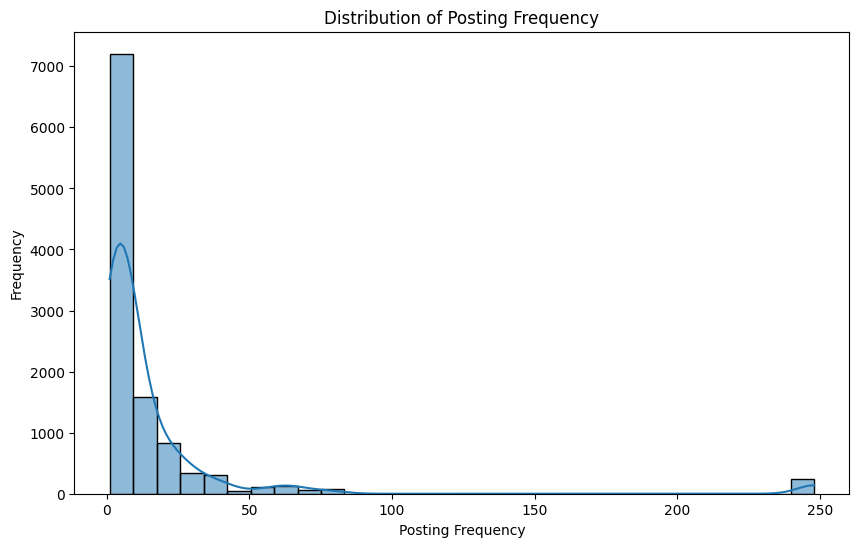

C:\Users\venka\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Correlation between Posting Frequency and Engagement Metric: 0.935615390141014
Comparison of Posting Frequency Across User Categories:
user_id
572033     4.0
572036     1.0
572037     3.0
572041     2.0
572042    13.0
          ... 
758788     4.0
760015     1.0
775309     2.0
790048     3.0
796449     3.0
Name: posting_frequency, Length: 2792, dtype: float64


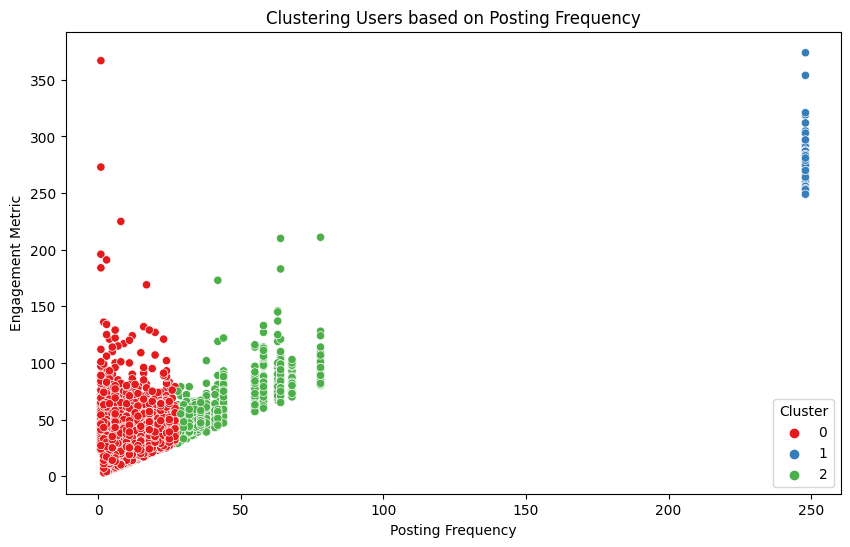

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.stats import pearsonr


# Step 1: Descriptive Statistics
posting_frequency_stats = extracted_data['posting_frequency'].describe()
print("Descriptive Statistics of Posting Frequency:")
print(posting_frequency_stats)

# Step 2: Visualization
plt.figure(figsize=(10, 6))
sns.histplot(extracted_data['posting_frequency'], bins=30, kde=True)
plt.title('Distribution of Posting Frequency')
plt.xlabel('Posting Frequency')
plt.ylabel('Frequency')
plt.show()

# Step 3: Segmentation (Clustering)

kmeans = KMeans(n_clusters=3, random_state=42)
extracted_data['cluster'] = kmeans.fit_predict(extracted_data[['posting_frequency']])

# Step 4: Correlation Analysis

correlation, _ = pearsonr(extracted_data['posting_frequency'], extracted_data['engagement_metric'])
print("Correlation between Posting Frequency and Engagement Metric:", correlation)


# Step 5: Comparative Analysis

posting_frequency_comparison = extracted_data.groupby('user_id')['posting_frequency'].mean()
print("Comparison of Posting Frequency Across User Categories:")
print(posting_frequency_comparison)


# Visualize cluster centers
plt.figure(figsize=(10, 6))
sns.scatterplot(data=extracted_data, x='posting_frequency', y='engagement_metric', hue='cluster', palette='Set1')
plt.title('Clustering Users based on Posting Frequency')
plt.xlabel('Posting Frequency')
plt.ylabel('Engagement Metric')
plt.legend(title='Cluster')
plt.show()

In [18]:
sentiment_df = extracted_data[['user_id', 'sentiment_score']].copy()
contentlen_df=extracted_data[['user_id','content_length']].copy()


In [19]:
# Group the dataset by user_id and count the frequency of hate speech instances for each usersentiment_df['user_id']=extracted_dat
hate_speech_frequency = extracted_data[extracted_data['label'] == 'hate'].groupby('user_id').size().reset_index(name='hate_speech_frequency')

# Merge hate speech frequency data with other behavioral patterns data
behavioral_patterns = pd.merge(hate_speech_frequency, posting_frequency_df, on='user_id', how='left')
behavioral_patterns = pd.merge(behavioral_patterns, sentiment_df, on='user_id', how='left')
#behavioral_patterns = pd.merge(behavioral_patterns, contentlen_df, on='user_id', how='left')

# Print the resulting DataFrame with user_id and associated behavioral patterns
print(behavioral_patterns)

      user_id  hate_speech_frequency  posting_frequency  sentiment_score
0      572033                      1                  4           0.0000
1      572033                      1                  4          -0.2960
2      572033                      1                  4           0.0000
3      572033                      1                  4           0.0000
4      572037                      3                  3          -0.9382
...       ...                    ...                ...              ...
4500   750200                      2                  4          -0.3662
4501   750200                      2                  4          -0.7351
4502   750212                      1                  1           0.6808
4503   775309                      1                  2          -0.6249
4504   775309                      1                  2           0.2960

[4505 rows x 4 columns]


In [20]:
maxlen=hate_speech_frequency.max()
print(maxlen)

user_id                  775309
hate_speech_frequency        21
dtype: int64


             user_id  hate_speech_frequency  posting_frequency  \
count    4505.000000            4505.000000        4505.000000   
mean   583097.188679               3.555383          27.859046   
std     28421.064305               4.725090          55.210737   
min    572033.000000               1.000000           1.000000   
25%    572710.000000               1.000000           5.000000   
50%    575766.000000               2.000000          11.000000   
75%    580712.000000               3.000000          23.000000   
max    775309.000000              21.000000         248.000000   

       sentiment_score  
count      4505.000000  
mean         -0.011076  
std           0.426140  
min          -0.988600  
25%          -0.296000  
50%           0.000000  
75%           0.316700  
max           0.968200  


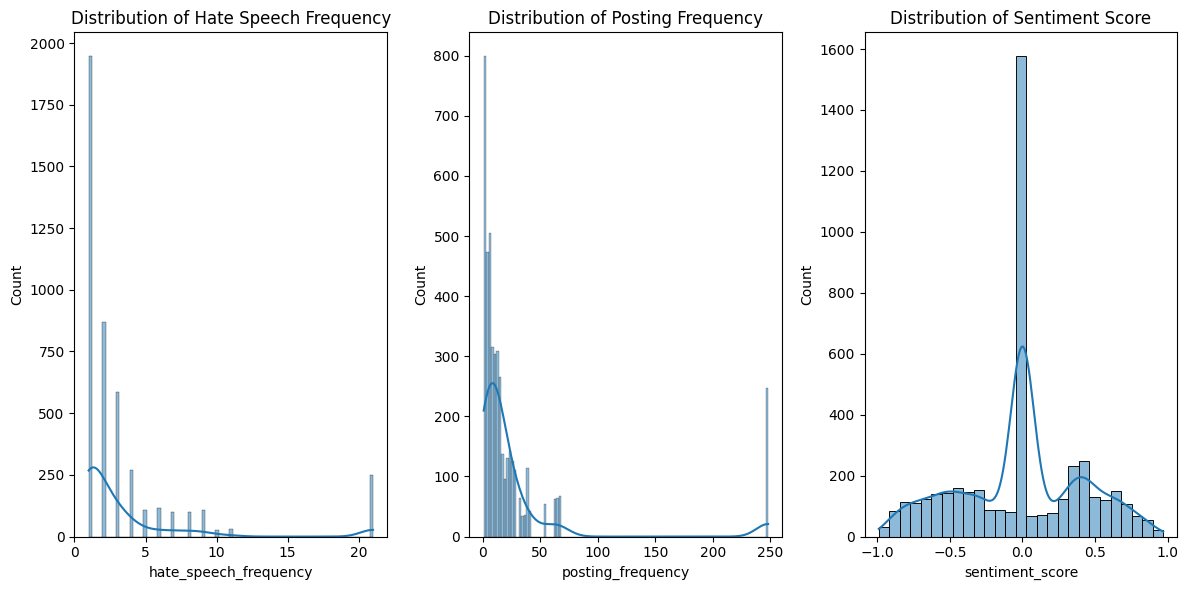

In [21]:
#Descriptive Statistics
# Compute descriptive statistics
descriptive_stats = behavioral_patterns.describe()
print(descriptive_stats)

# Explore distribution using histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.histplot(behavioral_patterns['hate_speech_frequency'], kde=True)
plt.title('Distribution of Hate Speech Frequency')

plt.subplot(1, 3, 2)
sns.histplot(behavioral_patterns['posting_frequency'], kde=True)
plt.title('Distribution of Posting Frequency')

plt.subplot(1, 3, 3)
sns.histplot(behavioral_patterns['sentiment_score'], kde=True)
plt.title('Distribution of Sentiment Score')

plt.tight_layout()
plt.show()

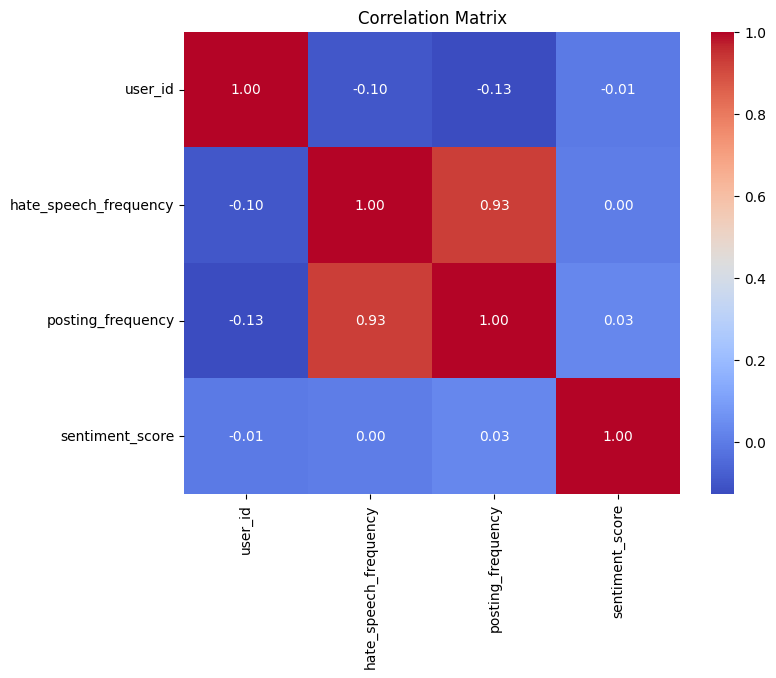

In [22]:
#Correlation analysis
# Calculate correlation matrix
correlation_matrix =behavioral_patterns.corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
#correlation b/w hate speech frequency and posting frequency =0.93

In [23]:
#Grouping by User_id
# Group by user_id and calculate summary statistics
grouped_stats = behavioral_patterns.groupby('user_id').agg({'hate_speech_frequency': ['mean', 'median'],
                                                'posting_frequency': ['mean', 'median'],
                                                'sentiment_score': ['mean', 'median']})
print(grouped_stats)


        hate_speech_frequency        posting_frequency        sentiment_score  \
                         mean median              mean median            mean   
user_id                                                                         
572033                    1.0    1.0               4.0    4.0       -0.074000   
572037                    3.0    3.0               3.0    3.0       -0.510300   
572043                   21.0   21.0             248.0  248.0        0.030211   
572057                    1.0    1.0              19.0   19.0       -0.033779   
572058                    4.0    4.0              13.0   13.0       -0.218869   
...                       ...    ...               ...    ...             ...   
750036                    1.0    1.0               1.0    1.0       -0.440400   
750045                    1.0    1.0               3.0    3.0        0.056700   
750200                    2.0    2.0               4.0    4.0       -0.461075   
750212                    1.

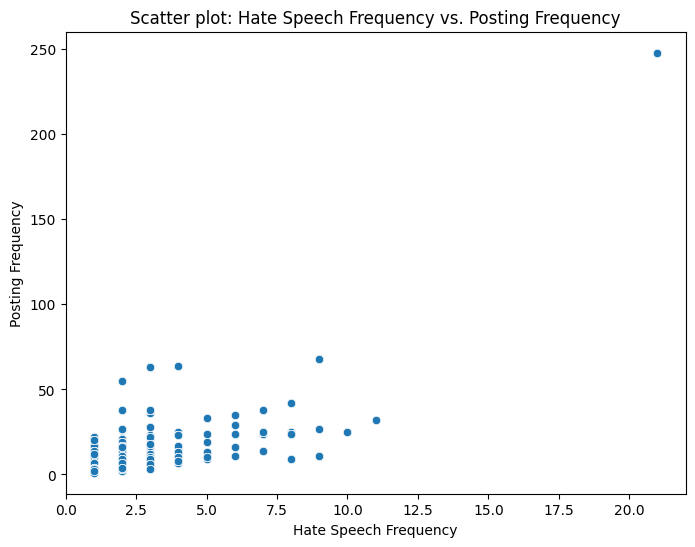

In [24]:
#Visualization

# Scatter plot between hate speech frequency and posting frequency
plt.figure(figsize=(8, 6))
sns.scatterplot(data=behavioral_patterns, x='hate_speech_frequency', y='posting_frequency')
plt.title('Scatter plot: Hate Speech Frequency vs. Posting Frequency')
plt.xlabel('Hate Speech Frequency')
plt.ylabel('Posting Frequency')
plt.show()

In [ ]:
#Geospatial Analysis

In [25]:
!pip install spacy


In [26]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 991.0 kB/s eta 0:00:13
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
     ---------------------------------------- 0.1/12.8 MB 1.3 MB/s eta 0:00:10
      -------------------------------------- 0.2/12.8 MB 958.4 kB/s eta 0:00:14
      -------------------------------------- 0.2/12.8 MB 860.2 kB/s eta 0:00:15
     - -------------------------------------- 0.4/12.8 MB 1.5 MB/s eta 0:00:09
     - -------------------------------------- 0.4/12.8 MB 1.5 MB/s eta 0:00:09
     - -------------------------------------- 0.5/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.5/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.5/12.8 MB 1.3 MB/s eta 0:00:10
     - -------------------------------------- 0.5/12.8 M

In [27]:
!pip install folium

In [28]:
import pandas as pd
import spacy
from collections import Counter
import folium

# Load spaCy model for English
nlp = spacy.load('en_core_web_sm')



# Function to extract location names from text using spaCy NER
def extract_locations(text):
    doc = nlp(text)
    locations = [ent.text for ent in doc.ents if ent.label_ == 'GPE']  # GPE: Geo-Political Entity
    return locations

# Apply the function to extract locations from text content
extracted_data['locations'] = extracted_data['text_content'].apply(extract_locations)

# Aggregate hate speech occurrences by location
location_counts = Counter(location for locations in extracted_data['locations'] for location in locations)

# Prepare data for visualization
location_data = pd.DataFrame(location_counts.items(), columns=['Location', 'Hate Speech Count'])

# Print textual output
print("Hate Speech Occurrences by Location:")
print(location_data)
                             
# Visualize hate speech occurrences on a map
map = folium.Map(location=[0, 0], zoom_start=2)
for index, row in location_data.iterrows():
    location = row['Location']
    count = row['Hate Speech Count']
    folium.CircleMarker(location=[0, 0], radius=count, popup=f"{location}: {count}", fill=True).add_to(map)

map.save('hate_speech_map.html')

Hate Speech Occurrences by Location:
           Location  Hate Speech Count
0            Israel                 25
1                US                 30
2    North Carolina                  2
3            Greece                 10
4         Hollywood                  3
..              ...                ...
769      WASHINGTON                  1
770     Interesting                  1
771           Jueda                  2
772           Tulsa                  1
773         Dragnet                  1

[774 rows x 2 columns]


In [29]:
#Top 5 locations of hate speech occurence
sorted_location_data = location_data.sort_values(by='Hate Speech Count', ascending=False)

# Select the top 5 locations with the highest hate speech occurrences
top_5_locations = sorted_location_data.head(5)

print("Top 5 Locations of Hate Speech Occurrences:")
print(top_5_locations)

Top 5 Locations of Hate Speech Occurrences:
   Location  Hate Speech Count
52  Ireland                 99
45   Canada                 57
80   Whites                 41
16   London                 41
21  America                 34


In [30]:
from geopy.geocoders import Nominatim

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Address to geocode
address = "New York, NY"

# Geocode address
location = geolocator.geocode(address)

# Extract latitude and longitude
latitude = location.latitude
longitude = location.longitude

print("Latitude:", latitude)
print("Longitude:", longitude)

Latitude: 40.7127281
Longitude: -74.0060152


In [32]:
from geopy.geocoders import Nominatim

# Initialize geocoder
geolocator = Nominatim(user_agent="my_geocoder")

# Function to geocode locations
def geocode_location(location):
    try:
        # Geocode location
        location_info = geolocator.geocode(location)
        if location_info:
            return location_info.latitude, location_info.longitude
        else:
            return None, None
    except Exception as e:
            print(f"Error geocoding {location}: {str(e)}")
            return None, None

# Apply geocoding function to each location in the DataFrame
location_data['Latitude'], location_data['Longitude'] = zip(*location_data['Location'].apply(geocode_location))

# Drop rows where geocoding failed to retrieve coordinates
location_data = location_data.dropna(subset=['Latitude', 'Longitude'])

# Print the DataFrame with latitude and longitude coordinates
print(location_data)

Error geocoding BLACK D.O.B: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=BLACK+D.O.B&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding ND: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=ND&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding Sofia: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Sofia&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))
Error geocoding Hawthorne: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /s

In [33]:
!pip install geopandas

In [34]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame from the location data
geometry = [Point(lon, lat) for lon, lat in zip(location_data['Longitude'], location_data['Latitude'])]
gdf = gpd.GeoDataFrame(location_data, geometry=geometry, crs='EPSG:4326')

# Save the GeoDataFrame as a shapefile
output_shapefile = 'hate_speech_locations.shp'
gdf.to_file(output_shapefile)

print(f"Shapefile saved as {output_shapefile}")

Shapefile saved as hate_speech_locations.shp


C:\Users\venka\AppData\Local\Temp\ipykernel_16116\315276501.py:10: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_shapefile)


In [35]:
!pip install libpysal

In [36]:
!pip install esda

In [37]:
import geopandas as gpd
import libpysal as lp
from esda.moran import Moran, Moran_Local
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load spatial data (shapefile or GeoDataFrame)
gdf = gpd.read_file('hate_speech_locations.shp')



# Calculate spatial weights matrix
w = lp.weights.DistanceBand.from_dataframe(gdf, threshold=100)

# Using .columns attribute
column_names = gdf.columns
print(column_names)



Index(['Location', 'Hate Speec', 'Latitude', 'Longitude', 'geometry'], dtype='object')


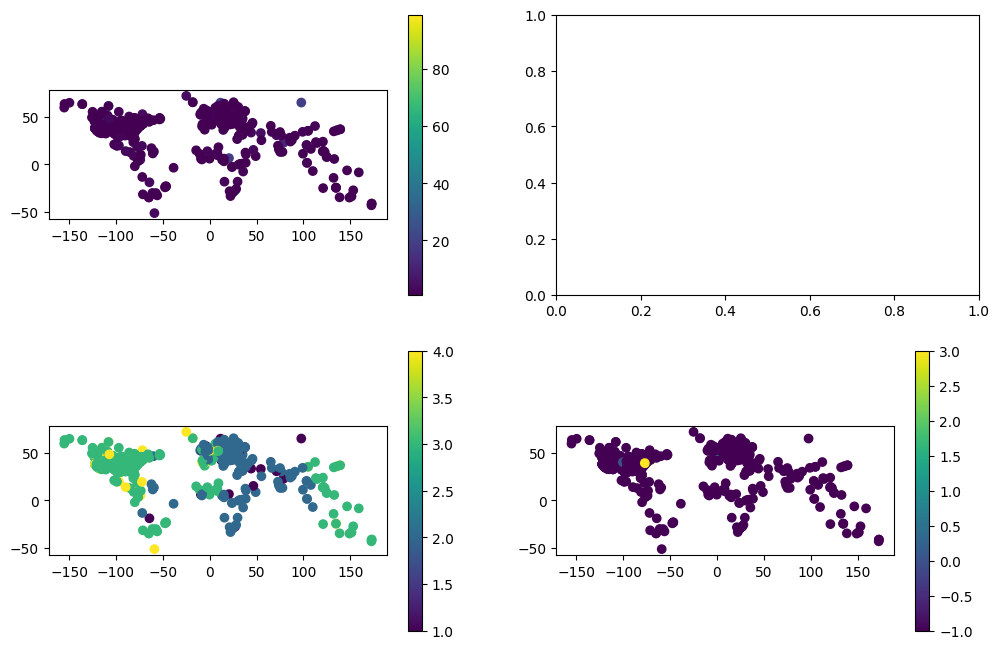

In [52]:

# Spatial autocorrelation analysis
moran = Moran(gdf['Hate Speec'], w)
lisa = Moran_Local(gdf['Hate Speec'], w)

# Spatial clustering
dbscan = DBSCAN(eps=0.1, min_samples=5).fit(gdf[['Latitude', 'Longitude']])


fig, ax = plt.subplots(2, 2, figsize=(12, 8))
gdf.plot(column='Hate Speec', ax=ax[0, 0], legend=True)

gdf.plot(column=lisa.q, ax=ax[1, 0], legend=True)
gdf.plot(column=dbscan.labels_, ax=ax[1, 1], legend=True)
plt.show()

In [ ]:
#iNFERENCES
Moran's I analysis (moran): The Moran's I statistic is calculated to assess spatial autocorrelation in the variable 'Hate Speech' frequency. It measures the spatial dependence of hate speech occurrences among neighboring locations.

Local Moran's I analysis (lisa): The Local Moran's I statistic is calculated to identify spatial clusters of high or low hate speech frequency values. It indicates whether hate speech occurrences are clustered in specific locations or dispersed across the study area.

Spatial clustering (dbscan): The DBSCAN algorithm is applied to detect spatial clusters of hate speech occurrences based on the latitude and longitude coordinates. It groups together neighboring locations with similar hate speech frequency values.

Visualization: The results of the analyses are visualized using subplots.

The first subplot displays the distribution of hate speech frequency across locations.
The second subplot displays the local spatial autocorrelation clusters identified by the Local Moran's I analysis.
The third subplot displays the spatial clusters detected by the DBSCAN algorithm based on the latitude and longitude coordinates.

In [ ]:
#TEMPORAL ANALYSIS

In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/a2/ad/e0d3c824784ff121c03cc031f944bc7e139a8f1870ffd2845cc2dd76f6c4/absl_py-2.1.0-py3-none-any.whl.metadata
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe8

In [14]:
extracted_data['label'].unique()


array(['noHate', 'hate', 'idk/skip', 'relation'], dtype=object)

In [15]:
extracted_data['label'].value_counts()

noHate      9507
hate        1196
relation     168
idk/skip      73
Name: label, dtype: int64

In [50]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Data Preparation
tokenizer = Tokenizer(num_words=10000)  # Limit vocabulary size

text_content = extracted_data['text_content']
label = extracted_data['label']

filtered_data = extracted_data[~extracted_data['label'].isin(['idk/skip', 'relation'])]

# Convert remaining labels to numerical format
# Assuming 'label' column contains the labels
filtered_data['label'] = filtered_data['label'].apply(lambda x: 1 if x == 'hate' else 0)

numerical_labels = filtered_data['label']
tokenizer.fit_on_texts(text_content)
sequences = tokenizer.texts_to_sequences(text_content)
padded_sequences = pad_sequences(sequences, maxlen=100)

# Check the shapes of input data and labels
print("Input data shape:", padded_sequences.shape)
print("Labels shape:", numerical_labels.shape)

# If there is a mismatch, adjust the shapes to match
if padded_sequences.shape[0] != numerical_labels.shape[0]:
    min_samples = min(padded_sequences.shape[0], numerical_labels.shape[0])
    padded_sequences = padded_sequences[:min_samples]
    numerical_labels = numerical_labels[:min_samples]

# Now both input data and labels should have the same number of samples
print("Adjusted input data shape:", padded_sequences.shape)
print("Adjusted labels shape:", numerical_labels.shape)

# Reshape the input data to 3D
padded_sequences = np.expand_dims(padded_sequences, axis=1)
numerical_labels=np.expand_dims(numerical_labels,axis=1)

print(padded_sequences.shape)
print(numerical_labels.shape)


# Shuffle and split the dataset into training, validation, and test sets
dataset = tf.data.Dataset.from_tensor_slices((padded_sequences, numerical_labels))
dataset = dataset.shuffle(buffer_size=len(padded_sequences), seed=42)

# Define the sizes for training, validation, and test sets
train_size = int(0.7 * len(padded_sequences))
val_size = int(0.15 * len(padded_sequences))
test_size = len(padded_sequences) - train_size - val_size

# Split the dataset
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size).take(val_size)
test_dataset = dataset.skip(train_size + val_size)

# Define your model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=10000, output_dim=64, input_length=100),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


from sklearn.utils.class_weight import compute_class_weight
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(numerical_labels), y=numerical_labels.flatten())
# Convert class weights to dictionary
class_weights_dict = dict(zip(np.unique(numerical_labels), class_weights))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
              

# Train the model using the training dataset
history = model.fit(train_dataset,
                    epochs=10,
                    validation_data=val_dataset,
                    class_weight=class_weights_dict)

# Evaluate the model using the test dataset
test_loss, test_accuracy = model.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

C:\Users\venka\AppData\Local\Temp\ipykernel_21472\703946348.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['label'] = filtered_data['label'].apply(lambda x: 1 if x == 'hate' else 0)


Input data shape: (10944, 100)
Labels shape: (10703,)
Adjusted input data shape: (10703, 100)
Adjusted labels shape: (10703,)
(10703, 1, 100)
(10703, 1)
Epoch 1/10
7492/7492 [==============================] - 43s 6ms/step - loss: 0.7014 - accuracy: 0.4788 - val_loss: 0.8846 - val_accuracy: 0.1277
Epoch 2/10
7492/7492 [==============================] - 44s 6ms/step - loss: 0.6898 - accuracy: 0.5180 - val_loss: 0.6489 - val_accuracy: 0.6118
Epoch 3/10
7492/7492 [==============================] - 44s 6ms/step - loss: 0.6017 - accuracy: 0.6520 - val_loss: 0.7798 - val_accuracy: 0.5097
Epoch 4/10
7492/7492 [==============================] - 45s 6ms/step - loss: 0.4623 - accuracy: 0.7780 - val_loss: 0.5991 - val_accuracy: 0.6380
Epoch 5/10
7492/7492 [==============================] - 46s 6ms/step - loss: 0.3296 - accuracy: 0.8664 - val_loss: 0.2048 - val_accuracy: 0.9072
Epoch 6/10
7492/7492 [==============================] - 45s 6ms/step - loss: 0.2570 - accuracy: 0.8990 - val_loss: 0.3486 

In [ ]:
#INFERENCES


Test Loss: The loss value, which indicates how well the model is performing on unseen data. A lower loss value is desirable, as it indicates better performance.
Test Accuracy: The accuracy of the model on the test dataset. It represents the proportion of correctly classified samples out of the total number of samples in the test dataset. Higher accuracy indicates better performance.
In this case, the model achieved a test loss of approximately 0.077 and a test accuracy of approximately 97.26%. These results suggest that the model performs well on unseen data and is effective in making accurate predictions after addressing the class imbalance issue.

